In [8]:
#TODO launch these
#replicate the itoffolo results for sanity check

In [9]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import numpy as np

In [10]:
from slam.utils.gates.custom_gates import CParitySwap, RiSwapGate, CCiXGate
c = CParitySwap()
c = CCiXGate()

In [11]:
#Recall that for 2Q gates we can easily check their Haar expectation numbers using monodromy polytopes
#However, to test for 3Q+ gates, we need to compute via randomly sampling and manually testing each template size and extending on fails
#much unfortunate
from slam.cost_function import BasicCost as Cost
objective = Cost()
from slam.optimizer import TemplateOptimizer
from slam.sampler import HaarSample
sampler = HaarSample(seed=0,n_samples=5,n_qubits=3) 
#TODO parallelize over sampling

# Experiment 0

In [ ]:
from slam.basis import CircuitTemplate
basis = CircuitTemplate(n_qubits=3, base_gates=[c], edge_params=[[(0,1,2)]], preseed=False, use_polytopes=0, no_exterior_1q=0)
basis.build(2)
basis.circuit.draw(output='mpl')

In [ ]:
basis.spanning_range=range(8,9) #go lower
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=False, success_threshold=1e-10, override_fail=True)
ret = optimizer.approximate_from_distribution(sampler) #[2] is best_cycles_list

INFO:root:Starting sample iter 0
INFO:root:Begin search: (-1, -1, -1, -1)
INFO:root:Starting opt on template size 7
INFO:root:Loss=1.3333136816839897e-09
INFO:root:Starting sample iter 1
INFO:root:Begin search: (-1, -1, -1, -1)
INFO:root:Starting opt on template size 7
INFO:root:Loss=7.063722939903982e-10
INFO:root:Starting sample iter 2
INFO:root:Begin search: (-1, -1, -1, -1)
INFO:root:Starting opt on template size 7
INFO:root:Loss=9.136327250303111e-10
INFO:root:Starting sample iter 3
INFO:root:Begin search: (-1, -1, -1, -1)
INFO:root:Starting opt on template size 7
INFO:root:Loss=1.6147292392076906e-09
INFO:root:Starting sample iter 4
INFO:root:Begin search: (-1, -1, -1, -1)
INFO:root:Starting opt on template size 7
INFO:root:Loss=1.2100245250223907e-09


In [7]:
np.average(ret[0])

1.155614492986956e-09

T6 (iccx = 0/0, cps = 0/0) 0.05496150640293558, 0.0016236120933669884
T7 (iccx = 0/0, cps = 0/0) 0.01790400059417192, ~40 mins, 1.155614492986956e-09 ~60 mins
T8 (iccx = 0/0, cps = 0/0)
T9 (iccx = 0/0, cps = 0/0)
T10 (iccx = 0/0, cps = 0/0)

# Experiment 1

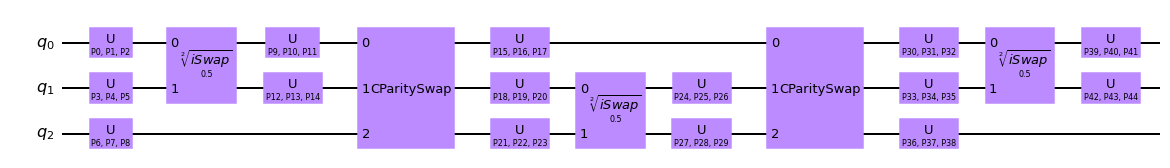

In [29]:
# basis = CircuitTemplate(n_qubits=3, base_gates=[RiSwapGate(1), CParitySwap()], edge_params=[[(0,1), (1,2)], [(0,1,2)]], preseed=False, use_polytopes=0, no_exterior_1q=0)
# basis.build(5)
# basis.circuit.draw(output='mpl')

# Experiment 1.5

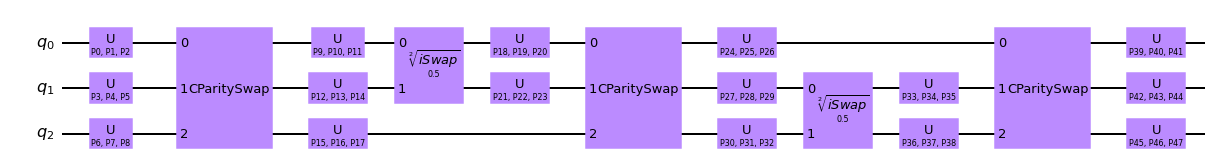

In [30]:
# basis = CircuitTemplate(n_qubits=3, base_gates=[CParitySwap(), RiSwapGate(1)], edge_params=[[(0,1,2)],[(0,1), (1,2)]], preseed=False, use_polytopes=0, no_exterior_1q=0)
# basis.build(5)
# basis.circuit.draw(output='mpl')

# Experiment 0.5

In [40]:
# from slam.utils.visualize import plotMatrix
# m = CParitySwap().power(1/2).to_matrix()
# plotMatrix(m);

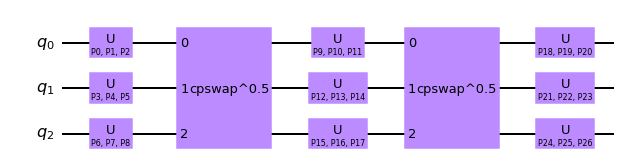

In [42]:
basis = CircuitTemplate(n_qubits=3, base_gates=[CParitySwap().power(1/2)], edge_params=[[(0,1,2)]], preseed=False, use_polytopes=0, no_exterior_1q=0)
basis.build(2)
basis.circuit.draw(output='mpl')

# Experiment 3

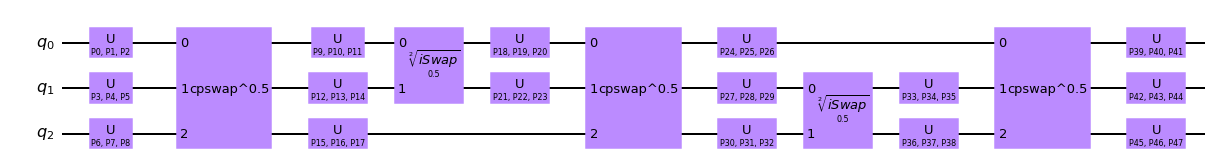

In [31]:
basis = CircuitTemplate(n_qubits=3, base_gates=[CParitySwap().power(1/2), RiSwapGate(1/2)], edge_params=[[(0,1,2)],[(0,1), (1,2)]], preseed=False, use_polytopes=0, no_exterior_1q=0)
basis.build(5)
basis.circuit.draw(output='mpl')